In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [6]:
training_data= pd.read_csv(r"D:\Kaggle\car.csv")


In [7]:
training_data.shape

(1728, 7)

In [8]:
training_data.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
print(training_data.dtypes)

Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object


In [11]:
training_data

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [56]:
#Modifying coloumn based on unique value


In [16]:
for i in training_data.columns:
    training_data = pd.concat([training_data, pd.get_dummies(training_data[i], prefix=f"{i}")], axis=1)
    training_data.drop(columns=i, inplace=True)

In [57]:
#After modifying coloumns

In [18]:
training_data.head()

,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_2,No_of_Doors_3,No_of_Doors_4,No_of_Doors_5more,Person_Capacity_2,Person_Capacity_4,...,Size_of_Luggage_big,Size_of_Luggage_med,Size_of_Luggage_small,Safety_high,Safety_low,Safety_med,Car_Acceptability_acc,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
0,False,False,False,True,True,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
1,False,False,False,True,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
2,False,False,False,True,True,False,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
3,False,False,False,True,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,False,False,False,True,True,False,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1724,False,True,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
1725,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False
1726,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False


In [58]:
#Get false value 0 and true value 1

In [19]:
training_data = training_data.astype(int)

In [20]:
training_data = training_data.replace({True: 1, False: 0})

In [21]:
training_data

,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_2,No_of_Doors_3,No_of_Doors_4,No_of_Doors_5more,Person_Capacity_2,Person_Capacity_4,...,Size_of_Luggage_big,Size_of_Luggage_med,Size_of_Luggage_small,Safety_high,Safety_low,Safety_med,Car_Acceptability_acc,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1724,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1725,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1726,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [59]:
#X gets all coloumns excepts last 4 coloumns and y gets last 4 coloumns

In [26]:
X = training_data[training_data.columns[:-4]]
y = training_data[training_data.columns[-4:]]

In [ ]:
#Training the value test size is 20 percent

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creating model

In [29]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])


In [30]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'] 
)


In [51]:
cp = ModelCheckpoint('model/', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[cp]
)

Epoch 1/100
13/22 [================>.............] - ETA: 0s - loss: 0.2576 - accuracy: 0.8486

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


22/22 [==============================] - 1s 65ms/step - loss: 0.2616 - accuracy: 0.8372 - val_loss: 0.8840 - val_accuracy: 0.7457
Epoch 2/100
15/22 [===================>..........] - ETA: 0s - loss: 0.2604 - accuracy: 0.8448

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


22/22 [==============================] - 1s 56ms/step - loss: 0.2668 - accuracy: 0.8444 - val_loss: 0.7954 - val_accuracy: 0.7457
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.8401 - val_loss: 0.8117 - val_accuracy: 0.7457
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.8394 - val_loss: 0.8351 - val_accuracy: 0.7543
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.8466 - val_loss: 0.9200 - val_accuracy: 0.7370
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.8408 - val_loss: 0.9597 - val_accuracy: 0.7457
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.8459 - val_loss: 0.9311 - val_accuracy: 0.7428
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.8423 - val_loss: 0.8877 - val_accuracy: 0.7572
Epoch 9/100
22/22 [=====

Epoch 60/100
22/22 [==============================] - 0s 12ms/step - loss: 0.2677 - accuracy: 0.8488 - val_loss: 0.8024 - val_accuracy: 0.7659
Epoch 61/100
22/22 [==============================] - 0s 12ms/step - loss: 0.2556 - accuracy: 0.8517 - val_loss: 0.8708 - val_accuracy: 0.7514
Epoch 62/100
22/22 [==============================] - 0s 12ms/step - loss: 0.2564 - accuracy: 0.8567 - val_loss: 0.9332 - val_accuracy: 0.7572
Epoch 63/100
22/22 [==============================] - 0s 13ms/step - loss: 0.2604 - accuracy: 0.8329 - val_loss: 0.9467 - val_accuracy: 0.7457
Epoch 64/100
22/22 [==============================] - 0s 12ms/step - loss: 0.2622 - accuracy: 0.8647 - val_loss: 0.9308 - val_accuracy: 0.7486
Epoch 65/100
22/22 [==============================] - 0s 12ms/step - loss: 0.2576 - accuracy: 0.8386 - val_loss: 0.9346 - val_accuracy: 0.7486
Epoch 66/100
22/22 [==============================] - 0s 12ms/step - loss: 0.2597 - accuracy: 0.8401 - val_loss: 0.9743 - val_accuracy: 0.7601

In [ ]:
#Plotting Graph

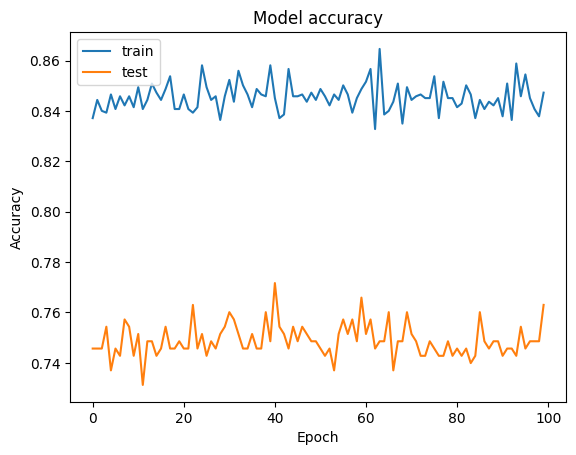

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Predict the model

In [53]:
y_pred = model.predict(X_test)


11/11 [==============================] - 0s 1ms/step


In [54]:
y_test

,Car_Acceptability_acc,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
599,0,0,1,0
1201,1,0,0,0
628,0,0,1,0
1498,1,0,0,0
1263,0,0,1,0
...,...,...,...,...
100,0,0,1,0
274,0,0,1,0
1206,0,0,1,0
101,0,0,1,0


In [42]:
y_pred = pd.DataFrame(y_pred, columns=list(y_test.columns))

In [43]:
y_test_list = []
y_pred_list = []

for i in range(len(y_pred)):
    y_test_list.append(y_test.columns[np.argmax(y_test.iloc[i])])
    y_pred_list.append(y_pred.columns[np.argmax(y_pred.iloc[i])])

                         precision    recall  f1-score   support

  Car_Acceptability_acc     0.5000    0.5783    0.5363        83
 Car_Acceptability_good     0.3750    0.2727    0.3158        11
Car_Acceptability_unacc     0.8760    0.9021    0.8889       235
Car_Acceptability_vgood     0.0000    0.0000    0.0000        17

               accuracy                         0.7601       346
              macro avg     0.4378    0.4383    0.4352       346
           weighted avg     0.7269    0.7601    0.7424       346



C:\Users\ratim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ratim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ratim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

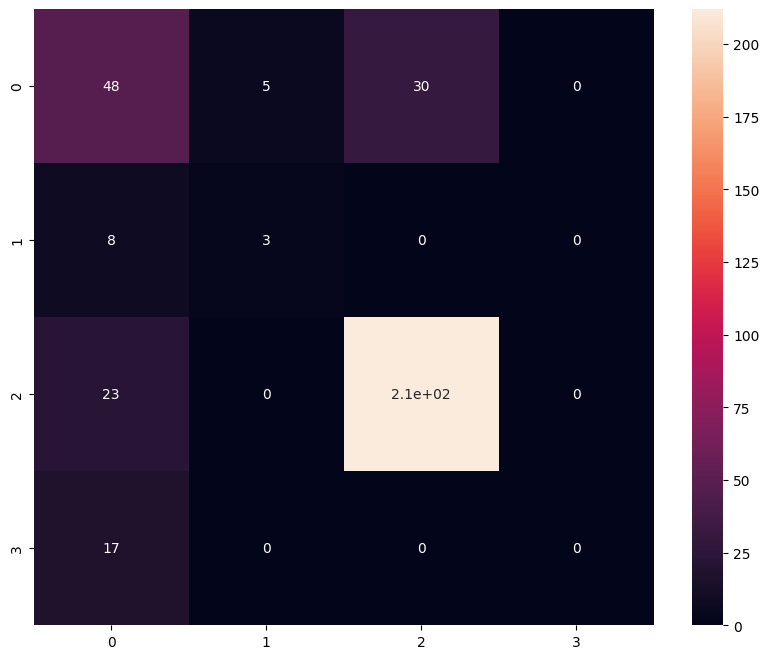

In [55]:
print(classification_report(y_test_list, y_pred_list, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test_list, y_pred_list), annot=True)
plt.show()